In [141]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pycountry
import pycountry_convert as pc
import numpy as np
import json

In [144]:
ip_to_location = pd.read_csv('/home/kin672/gentb-summer22/Geography/ip_to_location.csv')
uuid_to_ip = pd.read_csv('/home/kin672/gentb-summer22/Geography/uuid_to_ip.csv')
uuid_to_folder = pd.read_csv('/home/kin672/gentb-summer22/Geography/uuid_to_folder.csv')

In [112]:
def fix_dc(location):
    if 'Washington, D.C.' in str(location):
        location = location.replace('Washington, Washington, D.C.', 'Washington, D.C.')
    return(location)

In [113]:
ip_to_location['location'] = [fix_dc(location) for location in ip_to_location.location]

In [114]:
expanded_locations = ip_to_location['location'].str.split(', ', expand = True)
expanded_locations.columns = ['City', 'State/Region', 'Country']
ip_to_location = pd.concat([ip_to_location, expanded_locations], axis = 1)

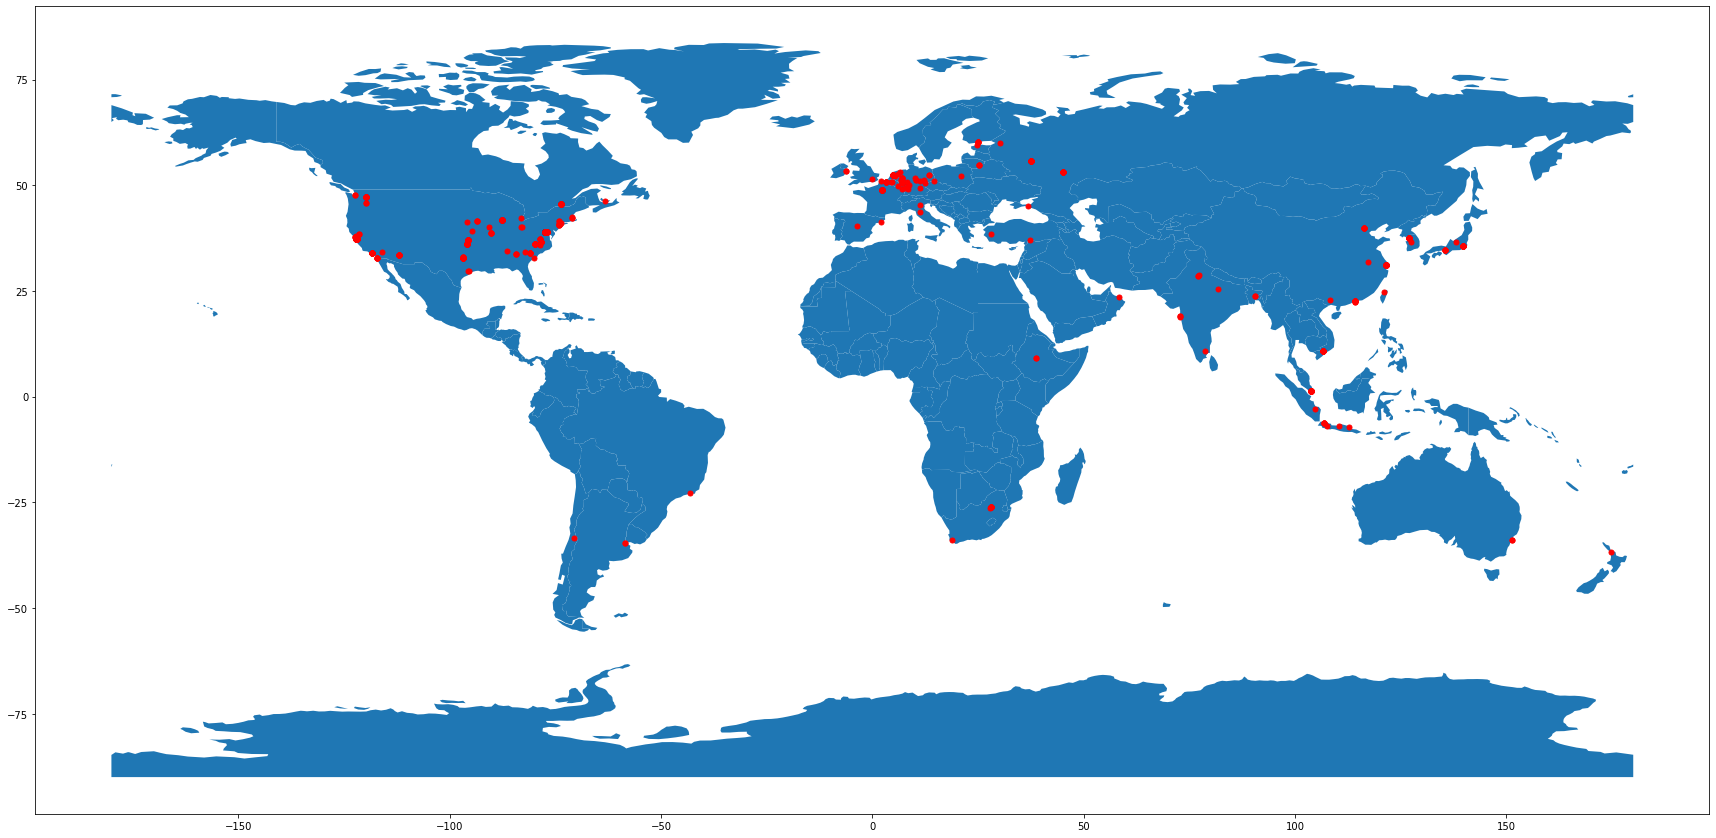

In [115]:
# Draw Map
geometry = [Point(xy) for xy in zip(ip_to_location['lng'], ip_to_location['lat'])]
gdf = GeoDataFrame(ip_to_location, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(30, 15)), marker='o', color='red', markersize=25);

In [116]:
ip_to_location['full_country'] = [pycountry.countries.get(alpha_2=str(country)).name for country in ip_to_location['Country']]

In [122]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [123]:
ip_to_location['Continent'] = [country_to_continent(country) for country in ip_to_location['full_country']]

In [134]:
ip_to_location.to_csv('/home/kin672/gentb-summer22/Geography/ip_to_location_EXTENDED.csv', index = False)